# The Complete Convolutional Neural Network with Python 2022

Artificial Neural Network (ANN)

The structure of the neural network contains the input layer, hidden layer and output layer. So, normally the information will be received by the input signal and then it will be trasferred to the hidden layers where all the information will be processed. Finally, after processing all information, output will be be released by the output layer.

Convolutional Neural Network (CNN)

CNNs are ANNs. CNNs are made of neurons that are connected to one another by weighted brances (weight); the training parameters of the networks are once again the weight and bias. In CNNs, the connection pattern between neurons is inspired by the structure of the visual cortex in the animal world. The individual neurons that are present in this part of the brain (visual cortex) respond to certain stimuli in a narrow region of the observation, called the receptive field.

The receptive fields of different neurons are partially overlapped to cover the entire field of vision. The response of a single neuron to stimuli taking place in it's receptive field can be mathematically approximated by a convolutional operation.

CNNs contain input layers, convolution layers, pooling layers, fully connected layers and output layers.

Convolution Layer

This is the main type of layer; the use of one or more of these layers in CNNs are essential. Convolution layers have neurons which are organized in 3 dimensons:

    Width
    Height
    Depth

During forward propagation, each filter which is spatially small (along the width and height dimensions) and extends over the entire depth of the input volume to which it is applied, is translated or convoluted with the width and height of the input volume producing a 2D activation map (or a feature map) for that filter. As the filter moved along the input area, a scalar product operation is performed between the values of the filter and those of the input portion to which it is applied.

The goal is to learn activated filers in the presense of some specific type of functionality in a given spatial region of the input. The queuing of all these feature maps (for all filters) and the depth dimension form the output volume of a convolution layer.

Each element of this volume can be interpreted as the output of a neuron that observes only a small region of the input which shares it's parameters with other neurons that are in the same feature map. Because these values all come from the application of the same filter.

Pooling Layers

These layers are inserted into the network to reduce the spatial size (width and height) of current representations, as well as volumes in a specific network stage. This serves to reduce the number of parameters and the computational time of the network. It also monitors overfitting. A pooling layer operates on each depth slice of the input volume independently to resize it spatially.

For each feature obtained in the convolutional step, a matrix will be built and we will find the maximum in each chosen matrix to shrink the entire input.

Steps:

    Pick a window size. ( 2 or 3 )
    Pick a stride moving range of pixels. ( usually 2 )
    Slide the window across the filtered images.

For each window, the maximum value will be chosen.

A pooling layer will divide input into regions and select a single representative value. (max pooling and average pooling)

The max pool layer will select the maximum number of features that have been detected by the convolution layers that precede it. The output will check whether a hypothetical feature is present in a region of the previous layers or not but not exactly where.

Hence, the idea is to allow the succesive layers to worn on larger selection of data. Max pooling allows for faster convergence rates and therefore, allow us to select higher invarient features to improve the generalization performance.

Advantages of using pooling layer:

    Reduce the calculation of subsequent layers.
    Increase the robustness of the features with respect to spatial position.

In [22]:
# Implement Basic CNN
# Importing and loading all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# import keras
from keras.preprocessing import image
# and use 
# image.ImageDataGenerator()
# image.load_img()

We will use the MNIST digits dataset and we can access to this dataset via Keras library

In [23]:
# Load the data and reshape the images in a 4-dimensional matrix 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Padding the images by 2 pixels
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')


The MNIST dataset includes training and test datasets. These datasets are composed of the grayscale images (integer arrays with shape (num_sample, 28, 28)) and the labels (integers in the range 0-9). Images are padded by 2 pixels because the input images were 32x32.

The next step is model parameters need to be set and the depth of the image (number of channels) will be 1. The reason for that is these images are grayscale.

In [24]:
image.width = x_train[0].shape[0]
image.height = x_train[0].shape[1]

# Grayscale = 1 channel
num_channels = 1
seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)


The next is training and test data variables will be declared and there will be various batch sizes for training and evaluation. these values can be changed depending on the physical memory that is available for training and evaluating.

In [25]:
batch_size = 100
evaluation_size = 500
epochs = 300
eval_every = 5

Our images need to be normalized to change the values of all pixels to a common scale

In [26]:
x_train = x_train/255
x_test = x_test/255

We will declare our model. We will have the feature extractor module composed of 2 convolutional/ReLu/max pooling layers followed by the classifier with fully connected layers. Also to get the classifer to work, we flatten the out of the feature extractor module. So we can use it in the classifier. We will use a softmax activation function at the last layer of the classifier. Softmax will turn numeric output (logits) into probabilities that sum to 1.

In [27]:
image_width = image.width
image_height = image.height

In [28]:
input_data = tf.keras.Input(dtype=tf.float32, 
                            shape=(image_width, 
                                   image_height, 
                                   num_channels), name="INPUT")

# First conv-ReLu-MaxPool layer
conv1 = tf.keras.layers.Conv2D(filters=6, 
                               kernel_size=5, 
                               padding="VALID", 
                               activation="relu", 
                               name="C1")(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(pool_size=2, 
                                      strides=2, 
                                      padding="SAME", 
                                      name="S1")(conv1)

# Second conv-ReLu-MaxPool layer
conv2 = tf.keras.layers.Conv2D(filters=16, 
                               kernel_size=5, 
                               padding="VALID", 
                               activation="relu", 
                               name="C3")(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(pool_size=2, 
                                      strides=2, 
                                      padding="SAME", 
                                      name="S4")(conv2)

# Flatten layer
flatten = tf.keras.layers.Flatten(name="FLATTEN")(max_pool2)

# First fully connected layer
fully_connected1 = tf.keras.layers.Dense(units=120, 
                                         activation="relu", 
                                         name="F5")(flatten)

# Second fully connected layer
fully_connected2 = tf.keras.layers.Dense(units=84, 
                                         activation="relu", 
                                         name="F6")(fully_connected1)

# Final fully connected layer
final_model_output = tf.keras.layers.Dense(units=10, 
                                           activation="softmax", 
                                           name="OUTPUT")(fully_connected2)

model = tf.keras.Model(inputs=input_data, outputs=final_model_output)

Next we will compile the model using Adam (Adaptive Moment Estimation) optimizer. Adam uses adaptive learning rates and momentum that allows us to get to local minima faster and so, converge faster.

Loss function is a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they're pretty good, it'll output a lower number.

As our targets are integers and not in a one-hot-encoded format, we will use the sparse categorical cross-entropy loss function and then we will add an accuracy metric to determine how accurate the model is in each batch.

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 32, 32, 1)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S1 (MaxPooling2D)            (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 400)               0         
_________________________________________________________________
F5 (Dense)                   (None, 120)              

The LeNet-5 model has 7 layers and contains 61706 trainable parameters. So, it is time to train the model. We can start training our model and we will loop through the data in randomly chosen batches. Every so often we can choose to evaluate the model on the train and test batches and record the accuracy and loss.

In [30]:
train_loss = []
train_acc = []
test_acc = []

for i in range(epochs):
  rand_index = np.random.choice(len(x_train), size=batch_size)
  rand_x = x_train[rand_index]
  rand_y = y_train[rand_index]

  history_train = model.train_on_batch(rand_x, rand_y)

  if(i+1) % eval_every == 0:
    eval_index =np.random.choice(len(x_test), size=evaluation_size)
    eval_x = x_test[eval_index]
    eval_y = y_test[eval_index]

    history_eval = model.evaluate(eval_x, eval_y)

    # Record and print results
    train_loss.append(history_train[0])
    train_acc.append(history_train[1])
    test_acc.append(history_eval[1])
    acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
    acc_and_loss =[np.round(x,2) for x in acc_and_loss]
    print('Epoch # {}, Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))


16/16 [==============================] - 0s 3ms/step - loss: 2.1737 - accuracy: 0.3460
Epoch # 5, Train Loss: 2.19. Train Acc (Test Acc): 0.23 (0.35)
16/16 [==============================] - 0s 3ms/step - loss: 1.9760 - accuracy: 0.5780
Epoch # 10, Train Loss: 2.01. Train Acc (Test Acc): 0.60 (0.58)
16/16 [==============================] - 0s 3ms/step - loss: 1.6060 - accuracy: 0.7300
Epoch # 15, Train Loss: 1.71. Train Acc (Test Acc): 0.74 (0.73)
16/16 [==============================] - 0s 3ms/step - loss: 1.2112 - accuracy: 0.7720
Epoch # 20, Train Loss: 1.32. Train Acc (Test Acc): 0.73 (0.77)
16/16 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.7980
Epoch # 25, Train Loss: 0.93. Train Acc (Test Acc): 0.78 (0.80)
16/16 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.7940
Epoch # 30, Train Loss: 0.82. Train Acc (Test Acc): 0.76 (0.79)
16/16 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.8460
Epoch # 

16/16 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9520
Epoch # 275, Train Loss: 0.25. Train Acc (Test Acc): 0.91 (0.95)
16/16 [==============================] - 0s 3ms/step - loss: 0.1441 - accuracy: 0.9620
Epoch # 280, Train Loss: 0.14. Train Acc (Test Acc): 0.97 (0.96)
16/16 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9580
Epoch # 285, Train Loss: 0.15. Train Acc (Test Acc): 0.96 (0.96)
16/16 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9380
Epoch # 290, Train Loss: 0.18. Train Acc (Test Acc): 0.95 (0.94)
16/16 [==============================] - 0s 3ms/step - loss: 0.1483 - accuracy: 0.9580
Epoch # 295, Train Loss: 0.12. Train Acc (Test Acc): 0.97 (0.96)
16/16 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9660
Epoch # 300, Train Loss: 0.11. Train Acc (Test Acc): 0.97 (0.97)


As can be seen from the above result after 300 epochs, the accuracy is around 96-97%

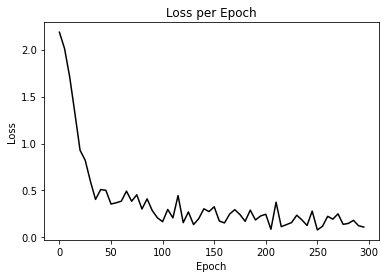

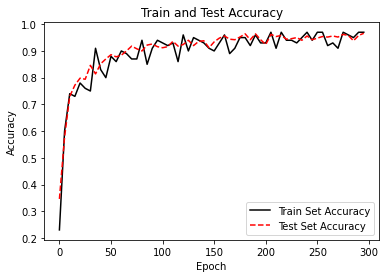

In [32]:
# Matplotlib code to plot the loss and accuracy
eval_indices = range(0, epochs, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


The bottom graph is the train and test set accuracy across 300 training epochs and the top plot is the softmax loss value over 300 epochs.

If we want to plot a sample of the latest batch result we can plot it.

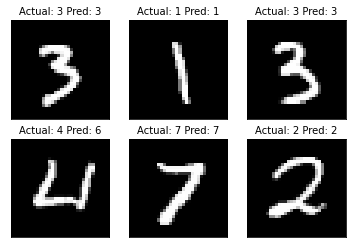

In [33]:
# Plot some samples and their predictions
actuals = y_test[30:36]
preds = model.predict(x_test[30:36])
predictions = np.argmax(preds, axis=1)
images = np.squeeze(x_test[30:36])
Nrows = 2
Ncols = 3

for i in range(6):
  plt.subplot(Nrows, Ncols, i+1)
  plt.imshow(np.reshape(images[i], [32,32]), cmap='Greys_r')
  plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]), fontsize=10)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()


According to the above result, a simple CNN Model was built successfully. It has good results in accuracy and loss for this project.

We did increase our performance on the MNIST dataset and built a model that has 97% of accuracy while we train the model from scratch. Our features extractor module is a combination of convolutions, ReLu and max pooling. Our classifier is a stack of fully connected layers. We trained in batches of size 100 and we also plotted the accuracy and loss across the epochs. Finally, we did plot 6 random digits and found that the model predicted only 1 wrong image. The model predict 6 but the actual image is 4.

CNN is a very good model for image recognition. The reason for that is the convolutional layer creates it's low-level features which are activated when they come across a part of the image that is crucial. This type of model creates features on it's own and uses them for prediction.